# SIT720 Assignment 3
Bryon Baker

Student number: 85031775

In [1]:
# TOTO: Uncomment this before submitting the assignment

#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn

In [2]:
import warnings
import random
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

# Configure ssl for unverified content so we can load a dataset from an unknown source (github).
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Question 1

Load and explore the training dataset. Explain the steps that you have taken.

In [26]:
import os

HOME = os.getenv('HOME')
print(f"HOME directory: {HOME}\n")

train_url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass3/ac_train_data.csv'
#train_url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass3/debug_ac_train_data.csv'
test_url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass3/ac_test_data.csv'
train_path = HOME+"/datasets/SIT720/Ass3/ac_train_data.csv"
train_path = HOME+"/datasets/SIT720/Ass3/debug_ac_train_data.csv"

test_path = HOME+"/datasets/SIT720/Ass3/ac_test_data.csv"

#
# Work out if the datasets are local. If not use a remote url. Preference is local.
#
print("Load datasets from local or remote resource:")
print("="*50)
if os.path.isfile(train_path):
    print(f"Training data is local: {train_path}")
    training_data = train_path
else:
    print("Training data is remote: {}".format(train_url))
    training_data = train_url

if os.path.isfile(test_path):
    print(f"Test data is local: {test_path}")
    test_data = test_path
else:
    print("Test data is remote: {}".format(test_url))
    test_data = test_url
print()

# Load the datasets from either local or remote.
train_df = pd.read_csv(training_data)
test_df = pd.read_csv(test_data)

HOME directory: /home/bryon

Load datasets from local or remote resource:
Training data is local: /home/bryon/datasets/SIT720/Ass3/debug_ac_train_data.csv
Test data is local: /home/bryon/datasets/SIT720/Ass3/ac_test_data.csv



In [4]:
# Drop the columns not used in the assignment

# Drop the sequence number (column 0) from the test dataset. Column 0 is unlabeled so use the index number.
train_df = train_df.drop(train_df.columns[[0]],axis=1)
test_df = test_df.drop(test_df.columns[[0]],axis=1)

In [5]:
# Ordinal encode the days of week.

oldCol = "dayofweek"
newCol = "dayofweeknum"
dayMap = {'Sun' : 0, 'Mon': 1, "Tue" : 2, "Wed" : 3, "Thu" : 4, "Fri" : 5, "Sat" : 6 }    # How to map the values

train_df[newCol] = train_df[oldCol].map(dayMap)    # Adds a new column with proper boolean values
train_df = train_df.drop([oldCol], axis=1)    # Drop the old column before renaming the new column to the name just dropped
train_df = train_df.rename(columns={newCol : oldCol})
      
train_df.head()

,load,ac,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst,dayofweek
0,2.245,0,0,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071,0
1,2.259,0,0,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154,0
2,2.269,0,0,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220,0
3,2.268,0,0,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150,0
4,2.270,0,0,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041,0


In [6]:
# Ordinal encode the dayof week in the test dataset.
test_df[newCol] = test_df[oldCol].map(dayMap)    # Adds a new column with proper boolean values
test_df = test_df.drop([oldCol], axis=1)    # Drop the old column before renaming the new column to the name just dropped
test_df = test_df.rename(columns={newCol : oldCol})
      
test_df.head()

,load,ac,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst,dayofweek
0,1.869,0,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1
1,1.673,0,0,-0.196,0.196,0.0,0.0,0.0,0.0,0.0,1
2,1.660,0,0,-0.013,0.013,0.0,0.0,0.0,0.0,0.0,1
3,1.772,0,0,0.112,0.112,0.0,0.0,0.0,0.0,0.0,1
4,1.679,0,0,-0.093,0.093,0.0,0.0,0.0,0.0,0.0,1


In [7]:
# Split out the X and y from the datasets
train_X = train_df.drop(['ac'], axis=1)
train_y = train_df["ac"]
test_X = test_df.drop(['ac'], axis=1)
test_y = test_df['ac']

print("Training Dataset")
print(f"{train_X.head()}\n")
print(f"{train_y.head()}\n")

print("Testing Dataset")
print(f"{test_X.head()}\n")
print(f"{test_y.head()}\n")

Training Dataset
    load  hourofday    dif  absdif    max       var   entropy  nonlinear  \
0  2.245          0  0.987   0.987  6.215  3.074549  0.678886   0.052903   
1  2.259          0  0.014   0.014  6.215  3.172867  0.667450   0.054829   
2  2.269          0  0.010   0.010  6.215  3.270112  0.647777   0.056991   
3  2.268          0 -0.001   0.001  6.215  3.303763  0.629227   0.057606   
4  2.270          0  0.002   0.002  6.215  3.302744  0.621295   0.082640   

      hurst  dayofweek  
0  0.994071          0  
1  0.994154          0  
2  0.994220          0  
3  0.994150          0  
4  0.994041          0  

0    0
1    0
2    0
3    0
4    0
Name: ac, dtype: int64

Testing Dataset
    load  hourofday    dif  absdif  max  var  entropy  nonlinear  hurst  \
0  1.869          0  0.000   0.000  0.0  0.0      0.0        0.0    0.0   
1  1.673          0 -0.196   0.196  0.0  0.0      0.0        0.0    0.0   
2  1.660          0 -0.013   0.013  0.0  0.0      0.0        0.0    0.0   


In [8]:
print("Summary Analysis of Dataset")
print(train_X.describe())
print()

print("Summary Analysis of the Class")
print(train_y.value_counts())

Summary Analysis of Dataset
                load      hourofday            dif        absdif  \
count  217251.000000  217251.000000  217251.000000  217251.00000   
mean        2.968518      11.461024       0.000003       0.22819   
std         2.182967       6.925030       0.676564       0.63692   
min         0.402000       0.000000      -7.970000       0.00000   
25%         0.932000       5.000000      -0.015000       0.00300   
50%         1.741000      11.000000      -0.001000       0.01300   
75%         5.156000      17.000000       0.011000       0.05300   
max        11.794000      23.000000       7.619000       7.97000   

                 max            var        entropy      nonlinear  \
count  217251.000000  217251.000000  217251.000000  217251.000000   
mean        5.552198       3.290766       0.674798       1.130694   
std         1.266561       1.175337       0.052712       1.936978   
min         0.668000       0.000030       0.541064       0.000002   
25%         4.

Variable Correlation Matrix


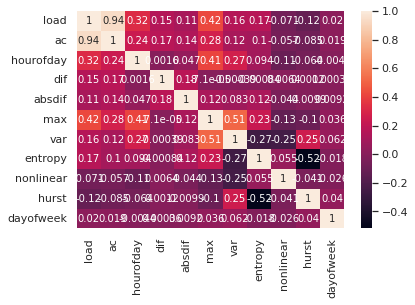

In [9]:
print("Variable Correlation Matrix")
corr_X = train_df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_X, annot=True)
plt.show()

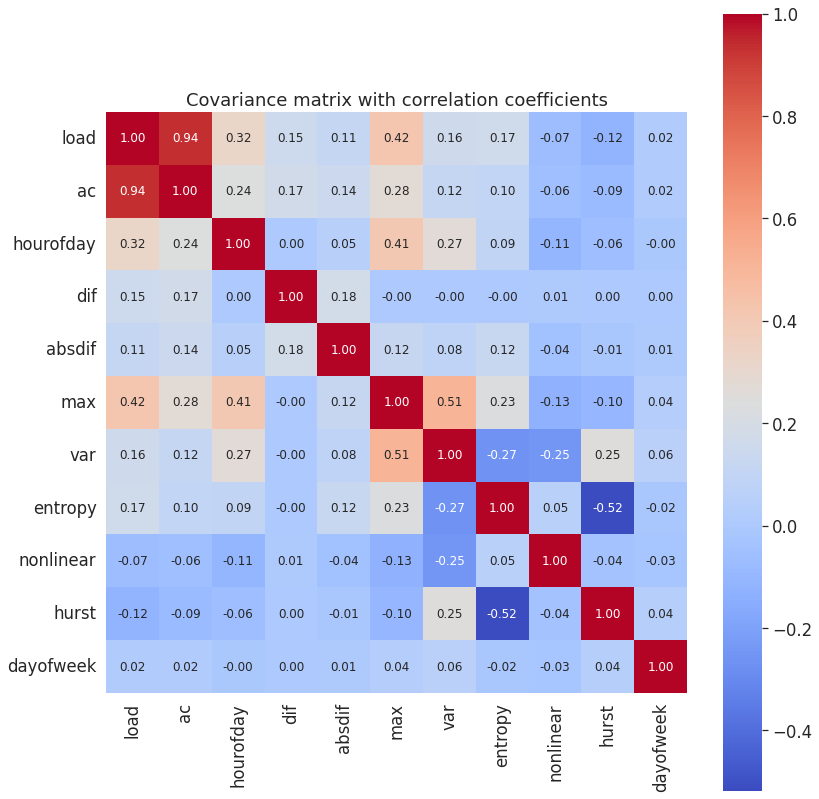

In [10]:
# Code snippet coutesy of: https://benjaminobi.medium.com/5-minutes-tutorial-on-how-to-compute-and-visualize-the-covariance-matrix-2597ab98d9ee#:~:text=The%20covariance%20matrix%20gives%20the,that%20displays%20the%20correlation%20coefficients.
#
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(train_df[train_df.columns].iloc[:,range(0,len(train_df.columns))].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(12,12))
sn.set(font_scale=1.5)
hm = sn.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=train_df.columns,
                 xticklabels=train_df.columns)
plt.title('Covariance matrix with correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [11]:
# Generate a pairplot
#sn.pairplot(train_df[train_X.columns], height=2.0)

# Question 2
Analyse the importance of the feautues for predicting air conditioner status using two different approaches.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif

def plotFeaturePerformance( fs, ticks, title ):
    # what are scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.xlabel("Feature")
    plt.ylabel("K-Best Score")
    plt.title(label=title, loc="center")
    plt.xticks(np.arange(len(ticks)), labels=ticks, rotation=70)
    
    plt.show()

def selectFeatures( X_train, y_pred, criteria, num_features ):
    fs = SelectKBest(criteria, k=num_features)
    fs.fit(X_train,y_pred)
    new_x_train = fs.transform(X_train)
    
    return new_x_train, fs

In [13]:
# Define the number of features to find.
num_features = 5
print("Column names:\n{}".format(train_X.columns))
new_x_train1, fs1 = selectFeatures( train_X, train_y, f_classif, num_features )
new_x_train2, fs2 = selectFeatures( train_X, train_y, f_regression, num_features )

Column names:
Index(['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy',
       'nonlinear', 'hurst', 'dayofweek'],
      dtype='object')


Feature 0: 1668002.475445
Feature 1: 12968.439061
Feature 2: 6504.620523
Feature 3: 4540.853920
Feature 4: 17819.074524
Feature 5: 2915.980922
Feature 6: 2234.159736
Feature 7: 705.663298
Feature 8: 1596.757800
Feature 9: 80.862984


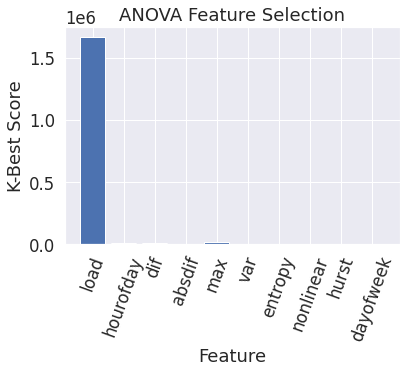

In [14]:
# Plot the feature selection charts.
plotFeaturePerformance( fs1, train_X.columns, "ANOVA Feature Selection" )

Feature 0: 1668002.475442
Feature 1: 12968.439061
Feature 2: 6504.620523
Feature 3: 4540.853920
Feature 4: 17819.074524
Feature 5: 2915.980922
Feature 6: 2234.159736
Feature 7: 705.663298
Feature 8: 1596.757800
Feature 9: 80.862984


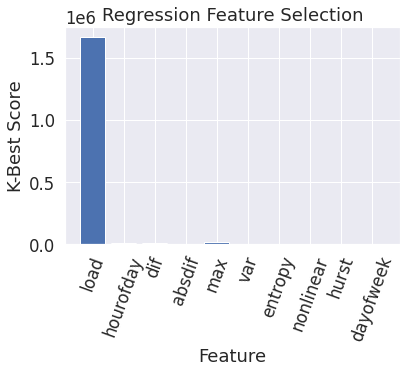

In [15]:
plotFeaturePerformance( fs2, train_X.columns, "Regression Feature Selection" )

In [16]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
Xnorm = scale(train_X)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(train_X.shape[0], train_X.shape[1])
print("Number of comoponets: {}".format(n_components))
n_components=7
pca = PCA(n_components)
Xnew = pca.fit_transform(Xnorm)
print("PCA details => {}".format(pca))

print(pca.get_params())

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

#cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_var)

dimensions = {}

# Find the minimum dimensions that capture 85% and 95% respectively
num_dimensions = 0
for value in cum_var:
    if value >= 85:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

num_dimensions = 0
for value in cum_var:
    if value >= 95:
        dimensions[value]=num_dimensions
        break
    num_dimensions += 1

print('='*50)

Number of comoponets: 10
PCA details => PCA(n_components=7)
{'copy': True, 'iterated_power': 'auto', 'n_components': 7, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
Explained Variance:
[0.21955047 0.17695179 0.1169853  0.09969411 0.09401299 0.08473565
 0.06686751]
Cumulative Explained Variance:
[21.95504745 39.65022682 51.34875701 61.31816821 70.71946671 79.1930313
 85.87978203]


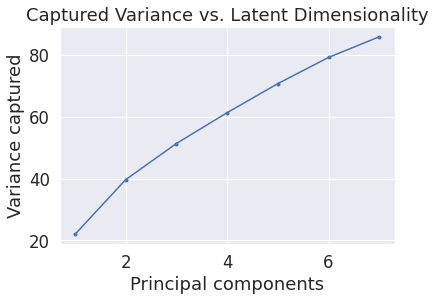

The minimum dimension that captures at least 86% variance is: 6


In [17]:
pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.title(label="Captured Variance vs. Latent Dimensionality", loc="center")
plt.show()

for key,value in dimensions.items():
    print("The minimum dimension that captures at least {:.0f}% variance is: {}".format(key,value))

In [18]:
print(pca.components_)

[[ 4.46906508e-01  4.45878752e-01  8.44744316e-02  1.84055584e-01
   5.64538637e-01  3.97747284e-01  1.70708320e-01 -2.06191828e-01
  -9.98997754e-02  4.37170907e-02]
 [ 1.20281928e-01 -9.60810438e-03  4.06849309e-02  6.97336869e-02
  -2.36875628e-03 -4.53005299e-01  6.09394935e-01  2.11847553e-01
  -5.91865164e-01 -8.45962990e-02]
 [ 1.21102384e-01 -1.80864943e-01  7.36801085e-01  5.94152448e-01
  -1.38956431e-01 -6.49847602e-02 -7.06931087e-02  7.38319308e-02
   1.47923990e-01  2.94453634e-02]
 [-4.95182705e-02 -1.28701031e-01 -7.18540622e-02  4.70380343e-02
   8.88395174e-04 -1.30565045e-02  1.00008000e-01 -7.62674464e-02
  -6.13055158e-02  9.76657796e-01]
 [ 2.74412190e-01  2.04185742e-01  1.39614764e-01 -3.18993997e-01
   8.81488492e-02 -2.92357421e-02 -1.46185723e-01  8.24027552e-01
   1.68639078e-01  1.55887527e-01]
 [-2.63689461e-01 -5.14778294e-02 -5.03256340e-01  6.45506447e-01
   1.60493398e-01  1.52341776e-01  9.45006285e-02  4.24764533e-01
   1.28634863e-01 -5.48090428e-02

In [19]:
train_X.shape[0]

217251

# Question 3
Based on the training data, create three different supervised machine learning models excet any ensemble approach for predicting air conditioner status
   1.	Report performance score using a suitable metric on the test data. Is it possible that the presented result is an underfitted or overfitted one? Justify.  
   2.	Justify different design decisions for each ML model used to answer this question.
   3.	Have you optimised any hyper-parameters for each ML model? What are they? Why have you done that? Explain. 
   4.	Finally, make a recommendation based on the reported results and justify it.

In [20]:
from sklearn import metrics

def display_stats(y_test, y_pred):
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))

    #Calculate F1 Score
    print("F1 Score:",metrics.f1_score(y_test, y_pred))

    #Calculate Mean Absolute Error
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

    # kappa
    print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

    # ROC AUC
    print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

In [21]:
import warnings
# Some of the hyper parameter combinations are invalid. Supress the warnings.
warnings.filterwarnings('ignore')

In [22]:
# https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
tscv = TimeSeriesSplit(n_splits=10)

max_leaf_nodes = [10, 50, 100, 500]
criterion = ["gini", "entropy"]
min_samples_split = [2,3,4,8]

i = 1
score = []
avg_score= []
for c in criterion:
    for m in max_leaf_nodes:     
        for s in min_samples_split:  
            i = 1
            for train_index, test_index in tscv.split(train_X):
                X_tr = train_X.iloc[train_index]
                X_val = train_X.iloc[test_index]
                y_tr = train_y.iloc[train_index]
                y_val = train_y.iloc[test_index]

                # Train the model with the training split
                model = DecisionTreeClassifier(criterion = c, max_leaf_nodes=m, min_samples_split=s)
                model.fit(X_tr, y_tr)

                # Now work with the testing split (vaidation set) and measure the performance
                y_pred = model.predict(X_val)

                # Find the performance info
                accuracy = metrics.accuracy_score(y_val, y_pred)
                precision = metrics.precision_score(y_val, y_pred)
                recall = metrics.recall_score(y_val, y_pred)
                f1 = metrics.f1_score(y_val, y_pred)

                # Store the results so we can average them after all the splits have been run.
                score.append([accuracy, precision, recall, f1])
                #print(f"{[accuracy, precision, recall, f1]}")

            # print(f"score: {score}")
            averages = np.array(score).mean(axis=0)
            
            print(f"{c} {m} {s}: Averages: {averages}")
            
            #avg_score.append([c, m, s, averages])
            #print(f"\niteration: {i}: {avg_score}")
            i += 1
print("complete:")
#print(score)

gini 10 2: Averages: [0.98701772 0.98157977 0.98938572 0.98544984]
gini 10 3: Averages: [0.98701772 0.98157977 0.98938572 0.98544984]
gini 10 4: Averages: [0.98701772 0.98157977 0.98938572 0.98544984]
gini 10 8: Averages: [0.98701772 0.98157977 0.98938572 0.98544984]
gini 50 2: Averages: [0.98743696 0.9824841  0.98943465 0.98593034]
gini 50 3: Averages: [0.98771814 0.98308884 0.98946913 0.98625252]
gini 50 4: Averages: [0.98791754 0.98351921 0.98949217 0.98648106]
gini 50 8: Averages: [0.98806329 0.98384323 0.98949972 0.98664823]
gini 100 2: Averages: [0.98817328 0.98408676 0.98950718 0.98677468]
gini 100 3: Averages: [0.98827291 0.98430931 0.98950183 0.98688418]
gini 100 4: Averages: [0.98833786 0.98446215 0.98949369 0.98695724]
gini 100 8: Averages: [0.98838692 0.98458807 0.98947827 0.98701306]
gini 500 2: Averages: [0.98828861 0.98454055 0.98932339 0.98691224]
gini 500 3: Averages: [0.9881953  0.9844962  0.98917016 0.98681371]
gini 500 4: Averages: [0.98811173 0.98445768 0.9890349  

In [23]:
# https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression

tscv = TimeSeriesSplit(n_splits=10)

penalty = ['none','l2']     # have left out none because of feedback form previous runs and the fact it generates a ton of incompatable param warnings
solver = ['newton-cg', 'lbfgs', 'liblinear']
C = [100, 10, 1.0, 0.1, 0.01]

i = 1
avg_score= []
for p in penalty:
    for s in solver:
        for c in C:
            if p == 'none' and s == 'liblinear':
                continue        # These are incompatible hyperparameters so skip them
            if p == 'l2' and c < 1.0:
                continue        # These are incompatible hyperparameters so skip them
     
            score = []       
            for train_index, test_index in tscv.split(train_X):
                X_tr = train_X.iloc[train_index]
                X_val = train_X.iloc[test_index]
                y_tr = train_y.iloc[train_index]
                y_val = train_y.iloc[test_index]
                
                # Train the model with the training split
                model = LogisticRegression(max_iter=10000, penalty=p, solver=s, C=int(c))
                model.fit(X_tr, y_tr)
                
                # Now work with the testing split (vaidation set) and measure the performance
                y_pred = model.predict(X_val)
                
                # Find the performance info
                accuracy = metrics.accuracy_score(y_val, y_pred)
                precision = metrics.precision_score(y_val, y_pred)
                recall = metrics.recall_score(y_val, y_pred)
                f1 = metrics.f1_score(y_val, y_pred)

                # Store the results so we can average them after all the splits have been run.
                score.append([accuracy, precision, recall, f1])
                #print(f"{[accuracy, precision, recall, f1]}")
                
            # print(f"score: {score}")
            averages = np.array(score).mean(axis=0)
            
            print(f"Averages: penalty: {p} solver: {s} C: {c} {averages}")
            
            #avg_score.append([p, s, c, averages])
            #print(f"\niteration: {i}: {avg_score}")
            i += 1
print("complete:")

Averages: penalty: none solver: newton-cg C: 100 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: newton-cg C: 10 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: newton-cg C: 1.0 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: newton-cg C: 0.1 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: newton-cg C: 0.01 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: lbfgs C: 100 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: lbfgs C: 10 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: lbfgs C: 1.0 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: lbfgs C: 0.1 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: none solver: lbfgs C: 0.01 [0.98666329 0.98592144 0.98404156 0.98496087]
Averages: penalty: l2 solver: newton-cg C: 100 [0.98670886 0.98594436 